# Car price prediction case study

#### The flow of the case study is as below:

1. Reading the data in python
2. Defining the problem statement
3. Identifying the Target variable
4. Looking at the distribution of Target variable
5. Basic Data exploration
6. Rejecting useless columns
7. Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
8. Feature Selection based on data distribution
9. Outlier treatment
10. Missing Values treatment
11. Visual correlation analysis
12. Statistical correlation analysis (Feature Selection)
13. Converting data to numeric for ML
14. Sampling and K-fold cross validation
15. Trying multiple Regression algorithms
16. Selecting the best Model

#### Data description
The business meaning of each column in the data is as below

Price: The Price of the car in dollars

Age: The age of the car in months

KM: How many KMS did the car was used

FuelType: Petrol/Diesel/CNG car

HP: Horse power of the car

MetColor: Whether car has metallic color or not

Automatic: Whether car has automatic transmission or not

CC: The engine size of the car

Doors: The number of doors in the car

Weight: The weight of the car

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('CarPricesData.csv')
data

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69.0,20544,Petrol,86,1,0,1300.0,3,1025.0
1432,10845,72.0,19000,Petrol,86,0,0,1300.0,3,1015.0
1433,8500,71.0,17016,Petrol,86,0,0,1300.0,3,1015.0
1434,7250,70.0,16916,Petrol,86,1,0,1300.0,3,1015.0


In [4]:
data.shape

(1436, 10)

In [5]:
data.head(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0
5,12950,32.0,61000,Diesel,90,0,0,2000.0,3,1170.0
6,16900,27.0,94612,Diesel,90,1,0,2000.0,3,1245.0
7,18600,30.0,75889,Diesel,90,1,0,2000.0,3,1245.0
8,21500,27.0,19700,Petrol,192,0,0,1800.0,3,1185.0
9,12950,23.0,71138,Diesel,69,0,0,1900.0,3,1105.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1434 non-null   float64
 2   KM         1436 non-null   int64  
 3   FuelType   1432 non-null   object 
 4   HP         1436 non-null   int64  
 5   MetColor   1436 non-null   int64  
 6   Automatic  1436 non-null   int64  
 7   CC         1434 non-null   float64
 8   Doors      1436 non-null   int64  
 9   Weight     1434 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 112.3+ KB


In [7]:
data.describe(include='all')

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1434.000000,1436.000000,1432,1436.000000,1436.000000,1436.000000,1434.000000,1436.000000,1434.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1260,NaN,NaN,NaN,NaN,NaN,NaN
mean,10730.824513,55.986750,68533.259749,NaN,101.502089,0.674791,0.055710,1566.990934,4.033426,1072.487448
std,3626.964585,18.581796,37506.448872,NaN,14.981080,0.468616,0.229441,187.178221,0.952677,52.672475
min,4350.000000,1.000000,1.000000,NaN,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,NaN,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63389.500000,NaN,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87020.750000,NaN,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000


In [8]:
data.isna().sum()   #isnull()

Price        0
Age          2
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       2
dtype: int64

In [9]:
data.nunique()

Price         236
Age            77
KM           1263
FuelType        3
HP             12
MetColor        2
Automatic       2
CC             12
Doors           4
Weight         59
dtype: int64

In [10]:
data['HP'].unique()

array([ 90, 192,  69, 110,  97,  71, 116,  98,  86,  72, 107,  73],
      dtype=int64)

In [11]:
data

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69.0,20544,Petrol,86,1,0,1300.0,3,1025.0
1432,10845,72.0,19000,Petrol,86,0,0,1300.0,3,1015.0
1433,8500,71.0,17016,Petrol,86,0,0,1300.0,3,1015.0
1434,7250,70.0,16916,Petrol,86,1,0,1300.0,3,1015.0


In [12]:
### EDA

In [13]:
data.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

<AxesSubplot:xlabel='HP', ylabel='Density'>

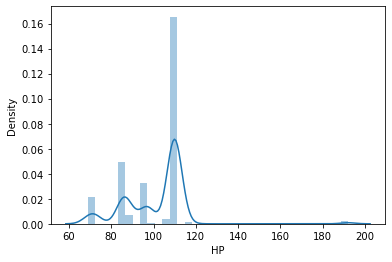

In [14]:
sns.distplot(data.HP)

In [15]:
data.HP.value_counts()

110    835
86     249
97     164
72      73
90      36
69      34
107     21
192     11
116      9
98       2
71       1
73       1
Name: HP, dtype: int64

In [16]:
import matplotlib.pyplot as plt

def plots(data, colstoplot):
    num_plots = len(colstoplot)
    fig, subplots = plt.subplots(nrows=1, ncols=num_plots, figsize=(20, 6))
    fig.suptitle('Bar charts of: ' + str(colstoplot))

    for col, subplot in zip(colstoplot, subplots):
        data.groupby(col).size().plot(kind='bar', ax=subplot)

# Example usage:
# data = ...  # Provide your data here
# colstoplot = ...  # Provide the columns you want to plot here
# plots(data, colstoplot)


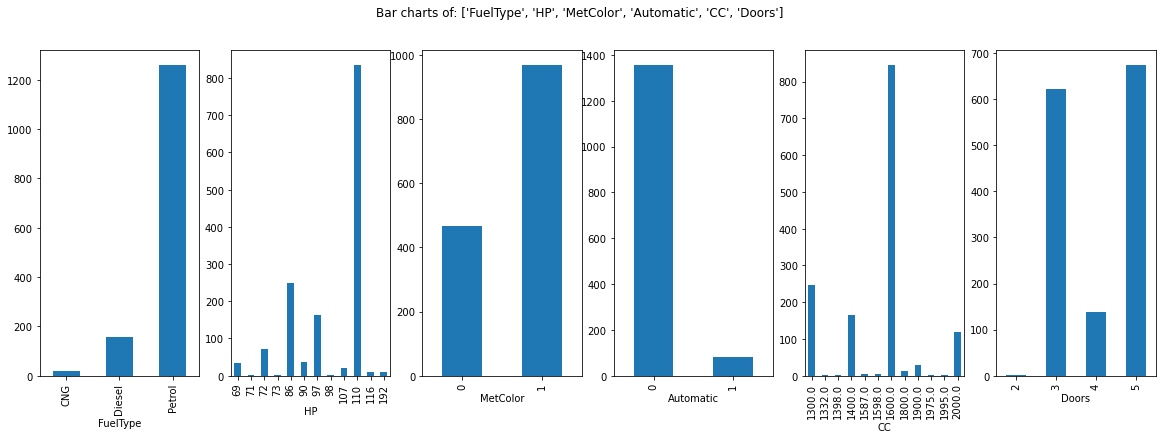

In [17]:
plots(data=data,colstoplot=['FuelType','HP','MetColor','Automatic','CC','Doors'])

In [18]:
data.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

<AxesSubplot:xlabel='Price', ylabel='Density'>

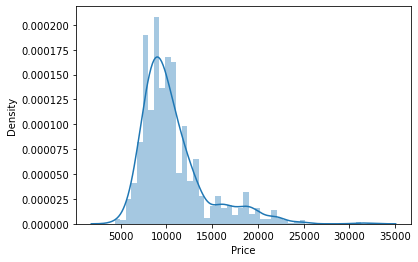

In [19]:
sns.distplot(data.Price)

<AxesSubplot:xlabel='Age', ylabel='Density'>

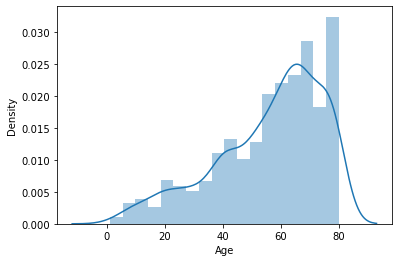

In [20]:
sns.distplot(data.Age)

<AxesSubplot:>

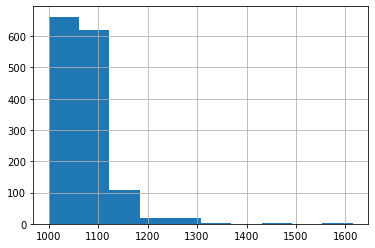

In [21]:
data.Weight.hist()

<AxesSubplot:xlabel='CC', ylabel='count'>

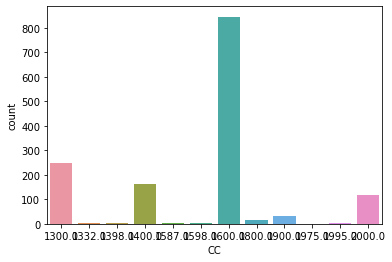

In [22]:
sns.countplot(data.CC)

In [23]:
## outliers

data.Weight.describe()

count    1434.000000
mean     1072.487448
std        52.672475
min      1000.000000
25%      1040.000000
50%      1070.000000
75%      1085.000000
max      1615.000000
Name: Weight, dtype: float64

<AxesSubplot:xlabel='Weight'>

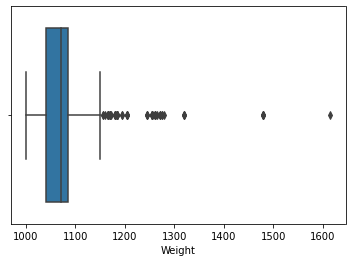

In [24]:
sns.boxplot(data.Weight)

<AxesSubplot:xlabel='Weight'>

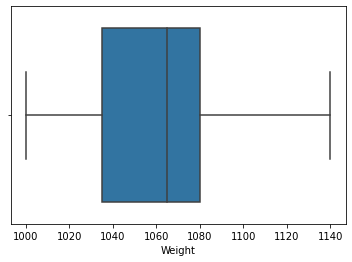

In [25]:
data=data[data['Weight']<1150]
sns.boxplot(data.Weight)

<AxesSubplot:xlabel='Weight', ylabel='Density'>

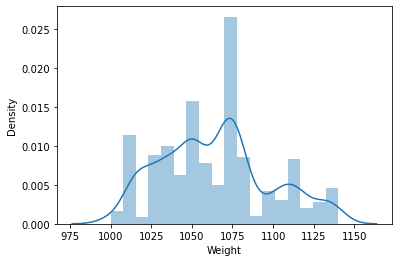

In [26]:
sns.distplot(data.Weight)

In [27]:
##missing value treatment

In [28]:
data.isna().sum()

Price        0
Age          2
KM           0
FuelType     3
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       0
dtype: int64

In [29]:
data[data.Age.isna()]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
38,15750,NaN,25329,Petrol,97,1,0,1400.0,3,1100.0
73,15750,NaN,28227,Petrol,97,1,0,1400.0,5,1110.0


In [30]:
data.Age.fillna(0,inplace=True)

In [31]:
data.isna().sum()

Price        0
Age          0
KM           0
FuelType     3
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       0
dtype: int64

In [32]:
data.FuelType.fillna('NA',inplace=True)

In [33]:
data[data.CC.isna()]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1392,7500,79.0,49827,Petrol,86,1,0,NaN,5,1035.0
1401,8950,71.0,47633,Petrol,110,1,0,NaN,5,1075.0


In [34]:
data['CC']=np.where(data['HP']==110,1600.0,data['CC'])
data['CC']=np.where(data['HP']==86,1300.0,data['CC'])

<AxesSubplot:>

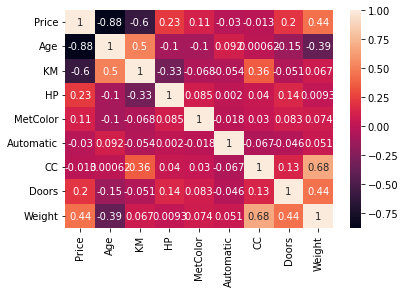

In [35]:
sns.heatmap(data.corr(),annot=True)


In [36]:
data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
9,12950,23.0,71138,Diesel,69,0,0,1900.0,3,1105.0
17,17950,24.0,21716,Petrol,110,1,0,1600.0,3,1105.0
18,16750,24.0,25563,Petrol,110,0,0,1600.0,3,1065.0
19,16950,30.0,64359,Petrol,110,1,0,1600.0,3,1105.0
20,15950,30.0,67660,Petrol,110,1,0,1600.0,3,1105.0


In [37]:
data=pd.get_dummies(data)
data.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_NA,FuelType_Petrol
9,12950,23.0,71138,69,0,0,1900.0,3,1105.0,0,1,0,0
17,17950,24.0,21716,110,1,0,1600.0,3,1105.0,0,0,0,1
18,16750,24.0,25563,110,0,0,1600.0,3,1065.0,0,0,0,1
19,16950,30.0,64359,110,1,0,1600.0,3,1105.0,0,0,0,1
20,15950,30.0,67660,110,1,0,1600.0,3,1105.0,0,0,0,1


In [38]:
x=data.drop(columns='Price')
y=data['Price']

In [39]:
x.head(2)

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_NA,FuelType_Petrol
9,23.0,71138,69,0,0,1900.0,3,1105.0,0,1,0,0
17,24.0,21716,110,1,0,1600.0,3,1105.0,0,0,0,1


In [40]:
## train and test split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=100)

In [43]:
x_train

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_NA,FuelType_Petrol
275,41.0,47350,110,1,0,1600.0,5,1075.0,0,0,0,1
890,60.0,61100,86,1,0,1300.0,3,1015.0,0,0,0,1
510,52.0,53561,97,1,0,1400.0,5,1060.0,0,0,0,1
453,52.0,73000,110,0,0,1600.0,3,1055.0,0,0,0,1
1084,73.0,134539,110,0,0,1600.0,5,1070.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
870,65.0,62396,110,0,0,1600.0,3,1050.0,0,0,0,1
84,25.0,15414,97,1,0,1400.0,5,1110.0,0,0,0,1
413,51.0,98040,110,0,0,1600.0,5,1080.0,0,0,0,1
127,20.0,35000,97,1,0,1400.0,5,1110.0,0,0,0,1


# Thank you